In [1]:
import sys
import ast
import numpy as np
from PIL import Image, ImageOps

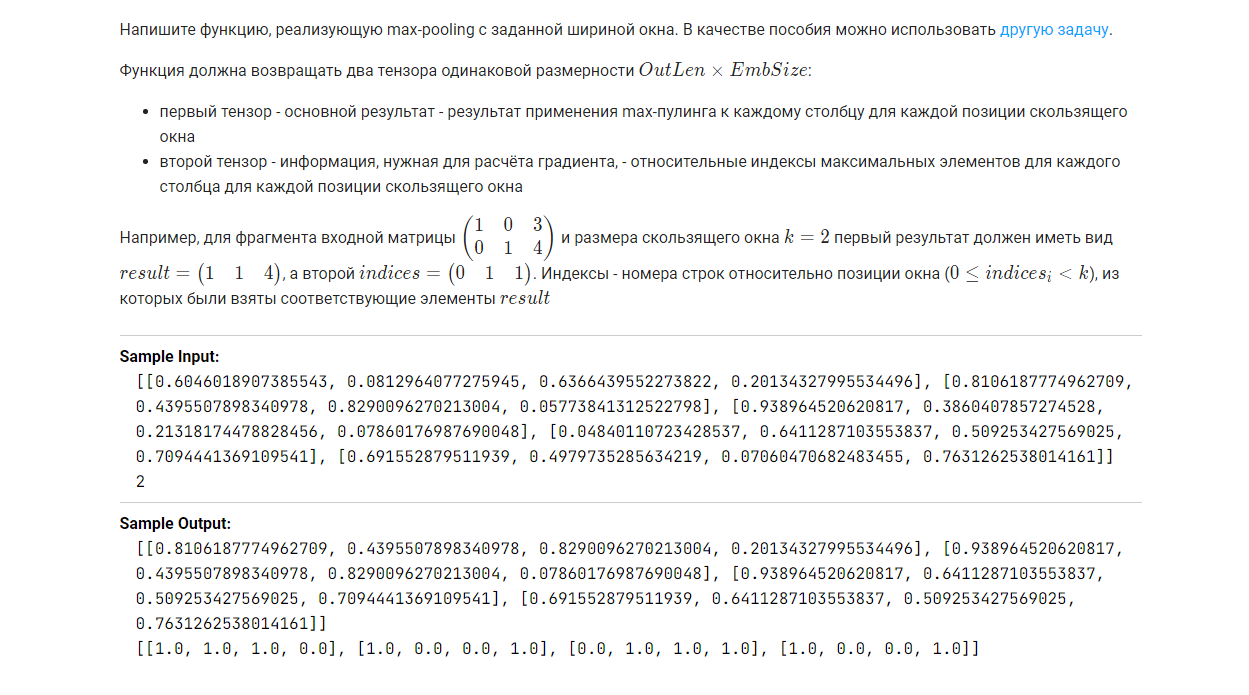

In [3]:
image = Image.open('samsung_nlp_4_7_1.png')
display(image)

In [ ]:
def parse_array(s):
    return np.array(ast.literal_eval(s))

def read_array():
    return parse_array(sys.stdin.readline())

def write_array(arr):
    print(repr(arr.tolist()))

In [ ]:
def max_pooling(features, kernel_size):
    """
    features - InLen x EmbSize - features of elements of input sequence
    kernel_size - positive integer - size of sliding window

    returns tuple of two matrices of shape OutLen x EmbSize:
         - output features (main result)
         - relative indices of maximum elements for each position of sliding window
    """
    k = features.shape[0]
    s = features.shape[1]
    x = []
    y = []
    for i in range(0,k-kernel_size+1):
        x1 = []
        y1 = []
        for j in range(0, s):
            a = features[i:i+kernel_size,j]
            a1 = np.max(a)
            b1 = np.argmax(a)
            x1.append(a1)
            y1.append(b1)
        x.append(x1)
        y.append(y1)
 
    
    return np.asarray(x),np.asarray(y)

In [ ]:
features = read_array()
kernel_size = int(sys.stdin.readline())

result, indices = max_pooling(features, kernel_size)

write_array(result)
write_array(indices)